In [83]:
%pip install PyWavelets
%pip install ffmpeg-python


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [84]:
# import pywt
import numpy as np
import soundfile as sf
from pywt import dwt,idwt

In [85]:
# audio_file = 'og.wav'
# signal, sr = sf.read(audio_file)
# coeffs = dwt(signal, 'db4')
# cA,cD=coeffs
# low=idwt(cA,None,'db4')
# low=idwt(cA,None,'db4')
# sf.write('low1.wav',low,sr)

In [86]:
audio_file = 'og.wav'
signal, sr = sf.read(audio_file)
for i in range (1,4):
    (cA,cD)=dwt(signal,'db4')
    low=idwt(cA,None,'db4')
    high=idwt(None,cD,'db4')
    fileNameLow=f'low{i}.wav'
    fileNameHigh=f'high{i}.wav'
    # sf.write(fileNameLow,low,sr)
    sf.write(fileNameHigh,high,sr)
    signal = low
sf.write('low.wav',low,sr)

In [87]:
%pip install Wave


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Combine the High freq files

In [88]:
import wave

# List of input WAV file names
input_files = ["high1.wav", "high2.wav", "high3.wav"]

# Open the input WAV files and get the audio parameters
params = None
input_data = []
for input_file in input_files:
    file = wave.open(input_file, "rb")
    input_data.append(file.readframes(file.getnframes()))
    if params is None:
        params = file.getparams()
    file.close()

# Create a new WAV file for the output
output_file = wave.open("output_combined.wav", "wb")
output_file.setparams(params)

# Write the audio data from each input file to the output file
for data in input_data:
    output_file.writeframes(data)

# Close the input and output files
output_file.close()

# Convert to mp3 lossy compression

In [89]:
from pydub import AudioSegment

# Load the WAV audio signal
audio = AudioSegment.from_wav("output_combined.wav")

# Compress the audio signal to MP3 format with a bit rate of 128 kbps
audio.export("mp3-output.mp3", format="mp3", bitrate="128k")

<_io.BufferedRandom name='mp3-output.mp3'>

# Convert low freq to lossless compression

In [90]:
# %pip install zlib

In [91]:
import wave
import zlib

# Open the original WAV file
with wave.open('low.wav', 'rb') as wav_file:
    # Read the data from the WAV file
    nchannels = wav_file.getnchannels()
    sampwidth = wav_file.getsampwidth()
    framerate = wav_file.getframerate()
    wav_data = wav_file.readframes(wav_file.getnframes())

# Compress the data using zlib
compressed_data = zlib.compress(wav_data)

# Write the compressed data to a file
with open('compressed.wav', 'wb') as compressed_file:
    compressed_file.write(compressed_data)


# Inverse Starts from Here

In [92]:
%pip install PyWavelets
%pip install ffmpeg-python
%pip install Wave


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Get back the low freq file

In [93]:
# Open the compressed file
with open('compressed.wav', 'rb') as compressed_file:
    # Read the compressed data from the file
    compressed_data = compressed_file.read()

# Decompress the data using zlib
decompressed_data = zlib.decompress(compressed_data)

# Open a new WAV file for writing
with wave.open('decompressed_low.wav', 'wb') as wav_file:
    # Set the WAV file parameters to match the original file
    wav_file.setnchannels(nchannels)
    wav_file.setsampwidth(sampwidth)
    wav_file.setframerate(framerate)

    # Write the decompressed data to the new WAV file
    wav_file.writeframes(decompressed_data)

# convert back to wav

In [94]:
from pydub import AudioSegment

# Load the MP3 audio file
audio = AudioSegment.from_mp3("mp3-output.mp3")

# Export the audio file as WAV format
audio.export("wav-output.wav", format="wav")

<_io.BufferedRandom name='wav-output.wav'>

## get back the files from combined file

In [95]:
import wave

# Open the combined WAV file
input_file = wave.open("wav-output.wav", "rb")

# Get the audio parameters
params = input_file.getparams()

# Create a new WAV file for each input file
file1 = wave.open("high1_i.wav", "wb")
file2 = wave.open("high2_i.wav", "wb")
file3 = wave.open("high3_i.wav", "wb")
file1.setparams(params)
file2.setparams(params)
file3.setparams(params)

# Read the audio data from the input file and write it to the output files
frames_read = 0
while frames_read < input_file.getnframes():
    data = input_file.readframes(6144)
    file1.writeframes(data[:2048])
    file2.writeframes(data[2048:4096])
    file3.writeframes(data[4096:])
    frames_read += 6144

# Close the input and output files
input_file.close()
file1.close()
file2.close()
file3.close()


# Inverse DWT to get back the Original Audio

In [96]:
# audio_file = 'og.wav'
# signal, sr = sf.read(audio_file)
# for i in range (1,4):
#     (cA,cD)=dwt(signal,'db4')
#     low=idwt(cA,None,'db4')
#     high=idwt(None,cD,'db4')
#     fileNameLow=f'low{i}.wav'
#     fileNameHigh=f'high{i}.wav'
#     sf.write(fileNameLow,low,sr)
#     sf.write(fileNameHigh,high,sr)
#     signal,sr=sf.read(fileNameLow)

# low_file='decompressed_low.wav'
# signal_low, sr = sf.read(low_file)
# for i in range (1,4):
#     high_file=f'high{4-i}_i.wav'
#     print(high_file)
#     signal_high,sr_high=sf.read(high_file)
#     (cA_low,cD_low)=dwt(signal_low,'db4')
#     (cA_high,cD_high)=dwt(signal_high,'db4')
#     # cD = np.zeros_like(cD_low)
#     # cD[:len(cD_high)] = cD_high
#     print(len(cA_high))
#     print(len(cA_low))
#     # Perform IDWT
#     signal_low = idwt(cA_low, cD_high, 'db4')
#     # signal_low=idwt(cA_low,cD_high,'db4')
# sf.write('karan.wav',signal_low)
low_file = 'decompressed_low.wav'
signal_low, sr = sf.read(low_file)

for i in range(1, 4):
    high_file = f'high{4-i}_i.wav'
    print(high_file)
    signal_high, sr_high = sf.read(high_file)

    # Apply DWT to both low and high frequency signals
    (cA_low, cD_low) = dwt(signal_low, 'db4')
    (cA_high, cD_high) = dwt(signal_high, 'db4')

    print(i)
    print(f"Length of cD_low: {len(cA_low)}")
    print(f"Length of cD_high: {len(cD_high)}")

    # Zero-pad the high-frequency coefficients to match the length of the low-frequency coefficients
    pad_len = len(cD_high) - len(cA_low)
    if pad_len<0:
        pad_len=pad_len*-1
        cD_high = np.pad(cD_high, (0,pad_len), 'constant', constant_values=0)
    else:
        cA_low = np.pad(cA_low, (0,pad_len), 'constant', constant_values=0)
    
    
    print(i)
    print(f"Length of cD_low: {len(cA_low)}")
    print(f"Length of cD_high: {len(cD_high)}")



    # Perform IDWT to combine the low and high frequency signals
    signal_low = idwt(cA_low, cD_high, 'db4')

# Write the combined signal to a new WAV file
signal_low = signal_low[:len(signal_low)//2]

sf.write('output.wav', signal_low, sr)

high3_i.wav
1
Length of cD_low: 330755
Length of cD_high: 661507
1
Length of cD_low: 661507
Length of cD_high: 661507
high2_i.wav
2
Length of cD_low: 661507
Length of cD_high: 165379
2
Length of cD_low: 661507
Length of cD_high: 661507
high1_i.wav
3
Length of cD_low: 661507
Length of cD_high: 165379
3
Length of cD_low: 661507
Length of cD_high: 661507


# PSNR ratio for output and input signals

In [97]:
import numpy as np
import soundfile as sf

# Load the original and reconstructed signals
original_file = 'og.wav'
reconstructed_file = 'output.wav'
original, sr = sf.read(original_file)
reconstructed, sr = sf.read(reconstructed_file)

# Ensure that the signals are the same length
min_length = min(len(original), len(reconstructed))
original = original[:min_length]
reconstructed = reconstructed[:min_length]

# Calculate the mean squared error (MSE) between the signals
mse = np.mean((original - reconstructed) ** 2)

# Calculate the maximum possible value of the signal
max_signal = np.max(original)

# Calculate the PSNR in decibels
psnr = 10 * np.log10(max_signal ** 2 / mse)

print(f"PSNR: {psnr} dB")

PSNR: 29.86372974209923 dB


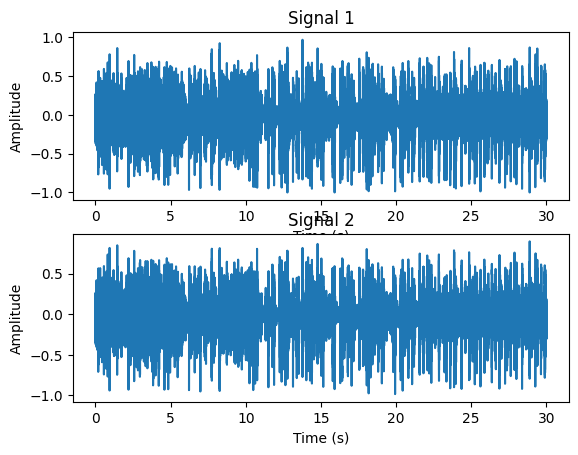

RMS Error: 0.031054270555374772


In [98]:
import matplotlib.pyplot as plt
# fileNameLow="low1.wav"
signal1,Fs1=sf.read('og.wav')
signal2,Fs2=sf.read('output.wav')
# Compute the RMS error between the two signals
error = np.sqrt(np.mean((signal1 - signal2)**2))

# Display a plot comparing the two signals
t1 = np.arange(0, len(signal1)/Fs1, 1/Fs1)
t2 = np.arange(0, len(signal2)/Fs2, 1/Fs2)
plt.subplot(2, 1, 1)
plt.plot(t1, signal1)
plt.title('Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(t2, signal2)
plt.title('Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Print the RMS error
print('RMS Error:', error)